## Data processing and plotting for figure06 showing a Critical Temperature Measurement

This notebook shows how we obtained the data for figure06 of the paper titled:

$\textit{A facility for cryogenic ion irradiation and in operando characterization of Rare-Earth Barium Copper Oxide superconducting tapes}$ by A.R Devitre, D.X. Fischer, K.B. Woller, B.C. Clark, M.P. Short, D.G. Whyte, and Z.S. Hartwig, published by the Review of Scientific Instruments. 

In particular, the notebook follows the treatment of our data treatment from raw data files (provided in ~/data/figure06/) to the production figure. This figure can be regenerated, modified, exported and reutilized according to the license of the repository (see LICENSE file).

In [1]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib, matplotlib.pyplot as plt
import os, numpy as np, pandas as pd
import hts_fitting as hts

# Change this to match
parentDirectory = '../data/figure06/'
outputDirectory = '../figures/raw/'

# Remove labels and change size
forPaper = True

# set a custom font
from matplotlib import font_manager
fontname = 'Century Gothic' 
fontfile = [f for f in font_manager.findSystemFonts(fontpaths='/Users/alexisdevitre/Library/Fonts') if fontname in f][0]
font_manager.fontManager.addfont(fontfile)
plt.rcParams['font.family'] = fontname

### Critical temperature measured with temperature ramp-up and ramp-down

This data was acquired from the pristine FFJ1 sample.

<IPython.core.display.Javascript object>


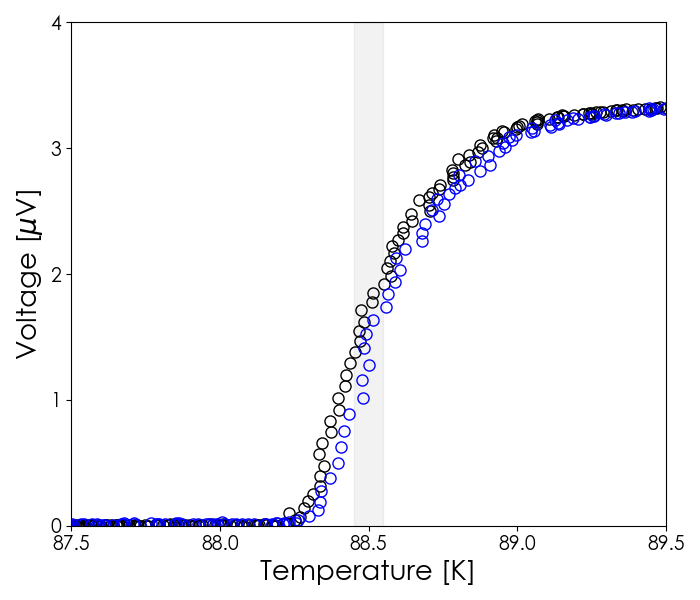

In [3]:
fdn = 'Tc_2023-08-15_23-44-08304345_rampdown.txt'
fup = 'Tc_2023-08-15_23-57-17628545_rampup.txt'

fig, ax = plt.subplots(figsize=(7, 6))
    
ismooth = np.linspace(0, 60, 10000)

for f, ec, m, fc, l in zip([fup, fdn], ['k', 'b'], ['o', 'o'], ['None', 'None'], ['ramp-up', 'ramp-down']):
    k, time, i, v, temps, _ = np.genfromtxt(parentDirectory+f, unpack=True)
    voffset = np.mean(v[temps < 87])
    ax.plot(temps, np.abs(1e6*v), linestyle='None', marker=m, mfc=fc, mec=ec, label=l)

ax.set_ylim(0, 4)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([87.5, 88.0, 88.5, 89, 89.5])
ax.set_xlim(87.5, 89.5)
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Voltage [$\mu$V]')
ax.fill_between([88.45, 88.55], np.array([4, 4]), np.array([-1, -1]), color='gray', alpha=.1)

fig.tight_layout()

ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure06.svg')